# PMF, PDF, CDF

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#
# Uncomment the following lines for floating plot windows
# import matplotlib
# matplotlib.use('Qt5Agg')
# %matplotlib qt5

Unknown-Course-Exam-Grades: All exam grades from some hypothetical course at some imaginary university. 

In [2]:
df = pd.read_csv('UCEG.csv')
df.describe()

,grade
count,455.000000
mean,69.494989
std,16.229258
min,29.650000
25%,57.040000
50%,69.930000
75%,80.900000
max,119.820000


<AxesSubplot:xlabel='grade', ylabel='Count'>

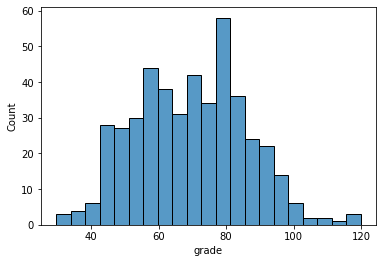

In [3]:
sns.histplot(data=df['grade'], bins=21)

## Task 

Investigate how the histogram changes depending on the number of bins chosen. 
* How many bins would you use as a student arguing that the professor is too strict?
* How many bins would you use to argue the counterpoint?

## Changing the $y$-axis

Above, we used raw counts, that is, number of grades is a bin, as the unit for the $y$-axis. To make this independent of class size and number of exams per course, we need to convert to percentages or probability. Compare the following plots:  

* stat='count': show the number of observations in each bin.
* stat='frequency': show the number of observations divided by the bin width.
* stat='probability': normalize such that bar heights sum to 1.
* stat='percent': normalize such that bar heights sum to 100.
* stat='density': normalize such that the total area of the histogram equals 1.

In [ ]:
sns.histplot(data=df['grade'], stat='count', bins=21)

## Task

Which is most useful for figuring out the portion of students in a certain grade range?

# PMF and PDF

* PMF = Probability mass function.
* PDF = Probability density function.

Okay, we have some variable, let's call it $X$. Capital $X$ indicates that $X$ is *random* in some sense, it may be data, but it may also be a stastic. Make sure you understand this distinction.

The difference between PMF and PDF has to do with random variables that can take only *discreet* values (PMF) as oposed to *continuous* values (PDF).
* Discreet: A certain set of numbers, often counts. The number of cars in a parking lot at a certain time or the citizens in a town must be whole = discrete numbers. You cannot have 0.3 citizens.
* Continuous: A variable measured on a continous scale: weight, height, ...

First, *discrete* $X$: A PMF is the function that gives the probability that my  discrete random variable $X$ is exactly equal to some value. Say, $X$: Number of children of a US citizen, then PMF(1) = probability that a US citizen has one child.

Note, the total probability must equal $1$. So if I sum the PMF over all possible values of $X$, I must get $1$.

Second, *continuous* $X$: A wee bit more tricky. Consider a huge population, say, the heights of everyone living in in the US, $330,000,000$ $X$ values. Strictly speaking all these $X$ values are different - you just have to measure enough significant figures. Therefore, all of the $330,000,000$ values have the same probability of $P=1/300,000,000$ and any other  value has probability $0$.  

However, that is ***not*** what we want. We want a function that interpolates a histogram with many, but not too many bins, a function that has the same shape as a reasonably fine histogram, but is continuous. This function is the PDF.

One caveat: A PDF cannot represent probability - probability is not defined at any specific $X$ value. Instead it represents ***probability density***, which means a PDF must be integrated over a certain range to compute probability. If you look at a PDF, you do that automatically by-eye: You look at area of a hump or of a tail, not at the specific values at certain points.

Again, note, the total probability must equal $1$. So if I integrate the PDF over all possible values of $X$, I must get $1$. Almost the same sentence as for the PMF. Make sure you understand the difference.

### Approximate PDF from `seaborn`

<AxesSubplot:xlabel='grade', ylabel='Density'>

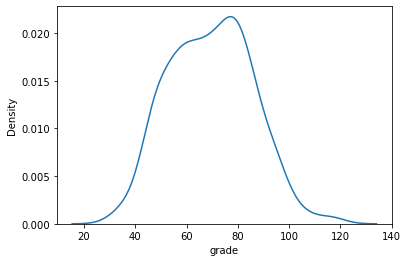

In [4]:
sns.kdeplot(data=df['grade'])

# CDF

First a convention used in statistics: $X$ is the random variable as such and $x$ is a particular value $X$ can take. So $X$ may be weight of a person, and $x$ may be $171$ lb. 

Now I can define a CDF: A CDF of a random variable $X$, evaluated at $x$ is the probability that $X$ will take a value less than or equal to $x$. Can we get that shorter please? Sure: CDF($x$) is the probability that $X \le x$.

CDFs come in a couple of flavours. Any discreet distribution or histogram can be turned into a step-wise CDF.  

Text(0, 0.5, 'CDF')

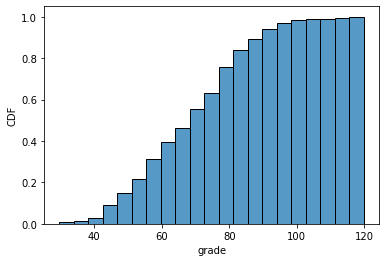

In [5]:
sns.histplot(data=df['grade'], stat='density', 
             cumulative=True, bins=21)
plt.ylabel('CDF')

Note, total probability must equal $1$, so a CDF must approach $1$, and in contrast to a PDF, a CDF can be directly associated with probability. Still, most people find PDFs visiually more apealing and intuative. As I said, the eye integrates.

Of course, we want a smoothed interpolated CDF.
* `seaborn` can do this to some extent.
* The scientific python library (`scipy`) has much more powerful methods.
* Sometimes we may want to fit our data to a model distrubution such as a Gaussian (a bellcurve).

In [ ]:
sns.ecdfplot(data=df['grade'])